Import packages needed 

In [1]:
import numpy as np
import csv
import astropy.io.fits as fits
import numpy as np
from photutils import aperture_photometry, CircularAperture, ApertureStats, CircularAnnulus
import matplotlib.pyplot as plt
from astropy.time import Time
import datetime
import glob
from astropy.io import fits
import datetime

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from astropy.io import fits
from astropy.utils.data import download_file

import os
import glob
import time
from matplotlib.colors import LogNorm
from IPython import display
from IPython.display import clear_output
import random

plt.rcParams.update({'font.size':15})



C:\Users\micha\AppData\Local\Temp\ipykernel_32796\2757022106.py:5: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  from photutils import aperture_photometry, CircularAperture, ApertureStats, CircularAnnulus
C:\Users\micha\AppData\Local\Temp\ipykernel_32796\2757022106.py:5: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  from photutils import aperture_photometry, CircularAperture, ApertureStats, CircularAnnulus
C:\Users\micha\AppData\Local\Temp\ipykernel_32796\2757022106.py:5: DeprecationWarning: `photutils.ApertureStats` is a deprecated alias for `photutils.aperture.ApertureStats` and will 

Define the file path and the `color` we want and show the images in that folder 

In [2]:
#colour = 'Luminance'
colour = 'Blue'
#colour = 'Green'
#colour = 'Red'

#filepath = "..\\..\\BPO_Data\\RZ_Cep\\2022_12_07\\RZ_Cep\\Lights\\"+colour+"\\"

filepath = ''

file_list = []

for file in glob.glob(filepath+"Reduced*.fits"):
    file_list.append(file)
print(print("\n".join(file_list)))  


Reduced_RV_Uma_Light_Blue_32_secs_001.fits
Reduced_RV_Uma_Light_Blue_32_secs_002.fits
Reduced_RV_Uma_Light_Blue_32_secs_003.fits
Reduced_RV_Uma_Light_Blue_32_secs_004.fits
Reduced_RV_Uma_Light_Blue_32_secs_005.fits
Reduced_RV_Uma_Light_Blue_32_secs_006.fits
Reduced_RV_Uma_Light_Blue_32_secs_007.fits
Reduced_RV_Uma_Light_Blue_32_secs_008.fits
Reduced_RV_Uma_Light_Blue_32_secs_009.fits
Reduced_RV_Uma_Light_Blue_32_secs_010.fits
Reduced_RV_Uma_Light_Blue_32_secs_011.fits
Reduced_RV_Uma_Light_Blue_32_secs_012.fits
Reduced_RV_Uma_Light_Blue_32_secs_013.fits
Reduced_RV_Uma_Light_Blue_32_secs_014.fits
Reduced_RV_Uma_Light_Blue_32_secs_015.fits
Reduced_RV_Uma_Light_Blue_32_secs_016.fits
Reduced_RV_Uma_Light_Blue_32_secs_017.fits
Reduced_RV_Uma_Light_Blue_32_secs_018.fits
Reduced_RV_Uma_Light_Blue_32_secs_019.fits
Reduced_RV_Uma_Light_Blue_32_secs_020.fits
Reduced_RV_Uma_Light_Blue_32_secs_021.fits
Reduced_RV_Uma_Light_Blue_32_secs_022.fits
Reduced_RV_Uma_Light_Blue_32_secs_023.fits
Reduced_RV_

Load all reduced files 

In [3]:
for file in glob.glob(filepath+"Reduced*.fits"):
    file_list.append(file)
    hdul = fits.open(file)
    hdul.info()
    print('\n')

Filename: Reduced_RV_Uma_Light_Blue_32_secs_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_002.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_003.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_006.fits
No.    Name      Ver  



Filename: Reduced_RV_Uma_Light_Blue_32_secs_046.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_047.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_048.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_049.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_050.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      41   (2328, 1760)   float32   


Filename: Reduced_RV_Uma_Light_Blue_32_secs_051.fits
No.    Name      Ver

Now look at the header of the files. This is useful for seeing the time the image was taken as well as other important features contained within the meta data of the image

In [4]:
header = fits.getheader(file_list[0])
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2328                                                  
NAXIS2  =                 1760                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ROWORDER= 'TOP-DOWN'           / Row Order                                      
INSTRUME= 'ZWO CCD ASI1600MM Pro' / CCD Name                                    
TELESCOP= 'SynScan '           / Telescope name                                 
OBSERVER= 'Unknown '           / Observer name                                  
OBJECT  = 'RV_UMa  '           / Object name                                    
EXPTIME =         3.200000E+

In [5]:
image_time = []

for file in file_list:
    header = fits.getheader(file)
    image_time.append(header['DATE-OBS'])

for file, time in zip(file_list, image_time):
    print(f"{file}\t{time}")


Reduced_RV_Uma_Light_Blue_32_secs_001.fits	2022-03-20T21:32:52.956
Reduced_RV_Uma_Light_Blue_32_secs_002.fits	2022-03-20T21:35:15.007
Reduced_RV_Uma_Light_Blue_32_secs_003.fits	2022-03-20T21:37:38.055
Reduced_RV_Uma_Light_Blue_32_secs_004.fits	2022-03-20T21:39:57.753
Reduced_RV_Uma_Light_Blue_32_secs_005.fits	2022-03-20T21:42:18.961
Reduced_RV_Uma_Light_Blue_32_secs_006.fits	2022-03-20T21:44:34.776
Reduced_RV_Uma_Light_Blue_32_secs_007.fits	2022-03-20T21:46:51.813
Reduced_RV_Uma_Light_Blue_32_secs_008.fits	2022-03-20T21:49:05.184
Reduced_RV_Uma_Light_Blue_32_secs_009.fits	2022-03-20T21:55:57.082
Reduced_RV_Uma_Light_Blue_32_secs_010.fits	2022-03-20T21:58:18.988
Reduced_RV_Uma_Light_Blue_32_secs_011.fits	2022-03-20T22:00:36.673
Reduced_RV_Uma_Light_Blue_32_secs_012.fits	2022-03-20T22:02:59.971
Reduced_RV_Uma_Light_Blue_32_secs_013.fits	2022-03-20T22:21:34.144
Reduced_RV_Uma_Light_Blue_32_secs_014.fits	2022-03-20T22:23:51.397
Reduced_RV_Uma_Light_Blue_32_secs_015.fits	2022-03-20T22:26:07

We can now see the longer exposure times come before the shorter. So 45 is earlier than 30. Tell python these are the times so it can do stuff. 

In [6]:
import os
import pandas as pd
from astropy.io import fits

# Set the directory containing the FITS files
#fits_dir = "Data\\RZ_Cep\\Light\\"+colour+"\\"
fits_dir = "C:\\Users\\micha\\OneDrive - University of Bath\\Astro group project\\Analysing_X_file\\RV Uma\\2022_03_20\\Blue"

# Initialize lists to store the FITS names, image times and exposure times
fits_name = []
image_time = []
exposure_time = []

# Loop over all FITS files in the directory
for filename in os.listdir(fits_dir):
    if filename.endswith('.fits') and "Reduced" in filename:
        # Open the FITS file and extract the header
        with fits.open(os.path.join(fits_dir, filename)) as hdu:
            header = hdu[0].header
            
        # Extract the FITS name, image time and exposure time from the header
        fits_name.append(filename)
        image_time.append(header['DATE-OBS'])
        exposure_time.append(header['EXPTIME'])

# Convert the FITS name, image time and exposure time lists to a pandas DataFrame
df_times = pd.DataFrame({'FITS Name': fits_name, 'Times from header': image_time, 'Exposure Time': exposure_time})
df_times


,FITS Name,Times from header,Exposure Time
0,Reduced_RV_Uma_Light_Blue_32_secs_001.fits,2022-03-20T21:32:52.956,32.0
1,Reduced_RV_Uma_Light_Blue_32_secs_002.fits,2022-03-20T21:35:15.007,32.0
2,Reduced_RV_Uma_Light_Blue_32_secs_003.fits,2022-03-20T21:37:38.055,32.0
3,Reduced_RV_Uma_Light_Blue_32_secs_004.fits,2022-03-20T21:39:57.753,32.0
4,Reduced_RV_Uma_Light_Blue_32_secs_005.fits,2022-03-20T21:42:18.961,32.0
5,Reduced_RV_Uma_Light_Blue_32_secs_006.fits,2022-03-20T21:44:34.776,32.0
6,Reduced_RV_Uma_Light_Blue_32_secs_007.fits,2022-03-20T21:46:51.813,32.0
7,Reduced_RV_Uma_Light_Blue_32_secs_008.fits,2022-03-20T21:49:05.184,32.0
8,Reduced_RV_Uma_Light_Blue_32_secs_009.fits,2022-03-20T21:55:57.082,32.0
9,Reduced_RV_Uma_Light_Blue_32_secs_010.fits,2022-03-20T21:58:18.988,32.0


In [7]:
coords = pd.read_csv('coord_uma.csv')
coords = coords.dropna()
print(coords)

      uma_x   uma_y
0   1148.25  900.75
1   1148.25  900.00
2   1148.75  899.25
3   1148.50  898.50
4   1153.50  909.25
5   1153.25  908.25
6   1154.00  918.25
7   1154.75  920.00
8   1159.75  884.00
9   1160.25  883.50
10  1160.50  883.25
11  1160.00  883.00
12  1168.50  886.75
13  1168.25  887.75
14  1168.25  886.75
15  1168.25  887.00
16  1170.00  878.25
17  1170.50  878.25
18  1170.75  887.00
19  1171.25  886.00
20  1170.75  881.75
21  1171.50  892.25
22  1172.00  898.25
23  1172.00  890.25
24  1172.50  894.25
25  1173.25  903.50
26  1173.25  901.00
27  1173.50  901.00
28  1174.75  912.50
29  1175.25  918.75
30  1175.50  910.50
31  1181.25  883.25
32  1181.00  884.50
33  1181.50  883.50
34  1181.00  883.25
35  1181.50  883.50
36  1182.25  882.75
37  1182.25  883.00
38  1182.75  883.00
39  1182.50  883.50
40  1182.25  883.50
41  1182.25  883.50
42  1182.75  883.50
43  1174.75  881.00
44  1175.00  881.00
45  1175.00  880.50
46  1175.75  880.50
47  1175.50  880.25
48  1174.75  880.75


In [8]:
import os
import pandas as pd
from astropy.io import fits

# Set the directory containing the FITS files
#fits_dir = "Data\\RZ_Cep\\Light\\" + colour + "\\"
fits_dir = "C:\\Users\\micha\\OneDrive - University of Bath\\Astro group project\\Analysing_X_file\\RV Uma\\2022_03_20\\Blue"

# Initialize lists to store the FITS names, image times and exposure times
fits_name = []
image_time = []
exposure_time = []

# Loop over all FITS files in the directory
for filename in os.listdir(fits_dir):
    if filename.endswith('.fits') and "Reduced" in filename:
        # Open the FITS file and extract the header
        with fits.open(os.path.join(fits_dir, filename)) as hdu:
            header = hdu[0].header

        # Extract the FITS name, image time and exposure time from the header
        fits_name.append(filename)
        image_time.append(header['DATE-OBS'])
        exposure_time.append(header['EXPTIME'])

# Convert the FITS name, image time and exposure time lists to a pandas DataFrame
df_times = pd.DataFrame({'FITS Name': fits_name, 'Times from header': image_time, 'Exposure Time': exposure_time})

# Load the coordinates DataFrame from file and drop rows with NaN values
coords = pd.read_csv('coord_uma.csv')
coords = coords.dropna()

# Merge the df_times and coords DataFrames based on their index
df_times = pd.merge(df_times, coords[['uma_x', 'uma_y']], left_index=True, right_index=True)

# Print the updated DataFrame
df_times

,FITS Name,Times from header,Exposure Time,uma_x,uma_y
0,Reduced_RV_Uma_Light_Blue_32_secs_001.fits,2022-03-20T21:32:52.956,32.0,1148.25,900.75
1,Reduced_RV_Uma_Light_Blue_32_secs_002.fits,2022-03-20T21:35:15.007,32.0,1148.25,900.00
2,Reduced_RV_Uma_Light_Blue_32_secs_003.fits,2022-03-20T21:37:38.055,32.0,1148.75,899.25
3,Reduced_RV_Uma_Light_Blue_32_secs_004.fits,2022-03-20T21:39:57.753,32.0,1148.50,898.50
4,Reduced_RV_Uma_Light_Blue_32_secs_005.fits,2022-03-20T21:42:18.961,32.0,1153.50,909.25
5,Reduced_RV_Uma_Light_Blue_32_secs_006.fits,2022-03-20T21:44:34.776,32.0,1153.25,908.25
6,Reduced_RV_Uma_Light_Blue_32_secs_007.fits,2022-03-20T21:46:51.813,32.0,1154.00,918.25
7,Reduced_RV_Uma_Light_Blue_32_secs_008.fits,2022-03-20T21:49:05.184,32.0,1154.75,920.00
8,Reduced_RV_Uma_Light_Blue_32_secs_009.fits,2022-03-20T21:55:57.082,32.0,1159.75,884.00
9,Reduced_RV_Uma_Light_Blue_32_secs_010.fits,2022-03-20T21:58:18.988,32.0,1160.25,883.50


In [9]:
df_times['Date Time thing'] = pd.to_datetime(df_times['Times from header'])

In [10]:
time_first_file = df_times['Date Time thing'][0]

# Net bit if Vicky's magic code.
df_times['Time_since_first (hrs)'] = (df_times['Date Time thing'] - time_first_file).apply(lambda x: 
                                                                         x/np.timedelta64(1, 'h')).fillna(0)

The first file may not be the first image so lets find the min time, could be most negative and subtract that from all the times 

In [11]:
df_times['Time_since_first (hrs)'] = df_times['Time_since_first (hrs)'] - df_times['Time_since_first (hrs)'].min()

In [12]:
df_times

,FITS Name,Times from header,Exposure Time,uma_x,uma_y,Date Time thing,Time_since_first (hrs)
0,Reduced_RV_Uma_Light_Blue_32_secs_001.fits,2022-03-20T21:32:52.956,32.0,1148.25,900.75,2022-03-20 21:32:52.956,0.000000
1,Reduced_RV_Uma_Light_Blue_32_secs_002.fits,2022-03-20T21:35:15.007,32.0,1148.25,900.00,2022-03-20 21:35:15.007,0.039459
2,Reduced_RV_Uma_Light_Blue_32_secs_003.fits,2022-03-20T21:37:38.055,32.0,1148.75,899.25,2022-03-20 21:37:38.055,0.079194
3,Reduced_RV_Uma_Light_Blue_32_secs_004.fits,2022-03-20T21:39:57.753,32.0,1148.50,898.50,2022-03-20 21:39:57.753,0.117999
4,Reduced_RV_Uma_Light_Blue_32_secs_005.fits,2022-03-20T21:42:18.961,32.0,1153.50,909.25,2022-03-20 21:42:18.961,0.157224
5,Reduced_RV_Uma_Light_Blue_32_secs_006.fits,2022-03-20T21:44:34.776,32.0,1153.25,908.25,2022-03-20 21:44:34.776,0.194950
6,Reduced_RV_Uma_Light_Blue_32_secs_007.fits,2022-03-20T21:46:51.813,32.0,1154.00,918.25,2022-03-20 21:46:51.813,0.233016
7,Reduced_RV_Uma_Light_Blue_32_secs_008.fits,2022-03-20T21:49:05.184,32.0,1154.75,920.00,2022-03-20 21:49:05.184,0.270063
8,Reduced_RV_Uma_Light_Blue_32_secs_009.fits,2022-03-20T21:55:57.082,32.0,1159.75,884.00,2022-03-20 21:55:57.082,0.384479
9,Reduced_RV_Uma_Light_Blue_32_secs_010.fits,2022-03-20T21:58:18.988,32.0,1160.25,883.50,2022-03-20 21:58:18.988,0.423898


Now we have time times per image number. So we want to order them in order of time since first image. 

In [13]:
df_sorted = df_times.sort_values(by='Time_since_first (hrs)', ascending=True)

# Print the sorted dataframe
df_sorted

,FITS Name,Times from header,Exposure Time,uma_x,uma_y,Date Time thing,Time_since_first (hrs)
0,Reduced_RV_Uma_Light_Blue_32_secs_001.fits,2022-03-20T21:32:52.956,32.0,1148.25,900.75,2022-03-20 21:32:52.956,0.000000
1,Reduced_RV_Uma_Light_Blue_32_secs_002.fits,2022-03-20T21:35:15.007,32.0,1148.25,900.00,2022-03-20 21:35:15.007,0.039459
2,Reduced_RV_Uma_Light_Blue_32_secs_003.fits,2022-03-20T21:37:38.055,32.0,1148.75,899.25,2022-03-20 21:37:38.055,0.079194
3,Reduced_RV_Uma_Light_Blue_32_secs_004.fits,2022-03-20T21:39:57.753,32.0,1148.50,898.50,2022-03-20 21:39:57.753,0.117999
4,Reduced_RV_Uma_Light_Blue_32_secs_005.fits,2022-03-20T21:42:18.961,32.0,1153.50,909.25,2022-03-20 21:42:18.961,0.157224
5,Reduced_RV_Uma_Light_Blue_32_secs_006.fits,2022-03-20T21:44:34.776,32.0,1153.25,908.25,2022-03-20 21:44:34.776,0.194950
6,Reduced_RV_Uma_Light_Blue_32_secs_007.fits,2022-03-20T21:46:51.813,32.0,1154.00,918.25,2022-03-20 21:46:51.813,0.233016
7,Reduced_RV_Uma_Light_Blue_32_secs_008.fits,2022-03-20T21:49:05.184,32.0,1154.75,920.00,2022-03-20 21:49:05.184,0.270063
8,Reduced_RV_Uma_Light_Blue_32_secs_009.fits,2022-03-20T21:55:57.082,32.0,1159.75,884.00,2022-03-20 21:55:57.082,0.384479
9,Reduced_RV_Uma_Light_Blue_32_secs_010.fits,2022-03-20T21:58:18.988,32.0,1160.25,883.50,2022-03-20 21:58:18.988,0.423898


# This is the correct order of the images. Now i need to find the star counts for each image based on the positions 

In [14]:
# Set the path to the directory containing the FITS files
#fits_dir = '/path/to/fits/files/'

# Get a list of all the FITS files in the directory
fits_files = glob.glob(filepath + '*.fits')

# Loop through the list of files and extract the data array for each one
for fits_file in fits_files:
    hdul1 = fits.getdata(fits_file)
    # Do something with the data array
hdul1

array([[1.7135267, 2.5411673, 3.239954 , ..., 1.9419181, 2.0604048,
        2.5204463],
       [2.2568698, 2.537153 , 2.2839773, ..., 2.1987624, 1.6687713,
        3.1973176],
       [2.191858 , 2.1263466, 2.1164563, ..., 2.508448 , 2.071899 ,
        2.0816417],
       ...,
       [2.4370046, 2.210277 , 2.4558465, ..., 2.8447173, 2.5632017,
        3.2112973],
       [2.4554434, 3.346979 , 1.7967956, ..., 2.2622762, 3.2289503,
        2.4795425],
       [2.6479163, 1.7907732, 2.2365818, ..., 1.8348134, 2.793068 ,
        3.1663165]], dtype=float32)

In [15]:
df_sorted

,FITS Name,Times from header,Exposure Time,uma_x,uma_y,Date Time thing,Time_since_first (hrs)
0,Reduced_RV_Uma_Light_Blue_32_secs_001.fits,2022-03-20T21:32:52.956,32.0,1148.25,900.75,2022-03-20 21:32:52.956,0.000000
1,Reduced_RV_Uma_Light_Blue_32_secs_002.fits,2022-03-20T21:35:15.007,32.0,1148.25,900.00,2022-03-20 21:35:15.007,0.039459
2,Reduced_RV_Uma_Light_Blue_32_secs_003.fits,2022-03-20T21:37:38.055,32.0,1148.75,899.25,2022-03-20 21:37:38.055,0.079194
3,Reduced_RV_Uma_Light_Blue_32_secs_004.fits,2022-03-20T21:39:57.753,32.0,1148.50,898.50,2022-03-20 21:39:57.753,0.117999
4,Reduced_RV_Uma_Light_Blue_32_secs_005.fits,2022-03-20T21:42:18.961,32.0,1153.50,909.25,2022-03-20 21:42:18.961,0.157224
5,Reduced_RV_Uma_Light_Blue_32_secs_006.fits,2022-03-20T21:44:34.776,32.0,1153.25,908.25,2022-03-20 21:44:34.776,0.194950
6,Reduced_RV_Uma_Light_Blue_32_secs_007.fits,2022-03-20T21:46:51.813,32.0,1154.00,918.25,2022-03-20 21:46:51.813,0.233016
7,Reduced_RV_Uma_Light_Blue_32_secs_008.fits,2022-03-20T21:49:05.184,32.0,1154.75,920.00,2022-03-20 21:49:05.184,0.270063
8,Reduced_RV_Uma_Light_Blue_32_secs_009.fits,2022-03-20T21:55:57.082,32.0,1159.75,884.00,2022-03-20 21:55:57.082,0.384479
9,Reduced_RV_Uma_Light_Blue_32_secs_010.fits,2022-03-20T21:58:18.988,32.0,1160.25,883.50,2022-03-20 21:58:18.988,0.423898


In [16]:
#Circular apertures will be drawn around all of the stars:

#positions = np.transpose((df_sorted['uma_x'], df_sorted['uma_y'])) 
x_coord = df_sorted['uma_x'].values[0]
y_coord = df_sorted['uma_y'].values[0]
apertures = CircularAperture((df_sorted['uma_x'], df_sorted['uma_y']), r=21)
#apertures = CircularAperture(positions, r = 21)  
phot_table = aperture_photometry(hdul1, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)


 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1 1148.25 1148.25    3486.0513
  2  900.75     900     3492.293


# Now plot these with the coordiantes to check they align

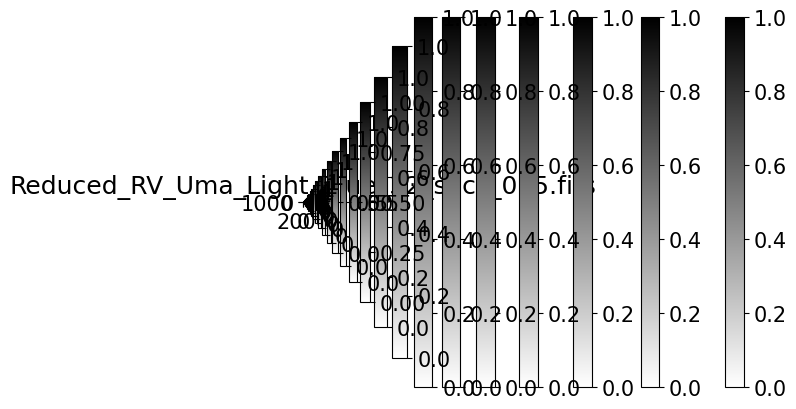

In [17]:
from astropy.visualization import ZScaleInterval
for file in file_list:
    with fits.open(file) as hdul:
        hdul1 = hdul[0].data
        zscale = ZScaleInterval()
        plt.imshow(zscale(hdul1), cmap='gray_r', origin='lower')
        plt.colorbar()
        plt.title(os.path.basename(file))

        # Get the coordinates for the star in this image
        row = df_times.loc[df_times['FITS Name'] == os.path.basename(file)]
        x_coord = df_sorted['uma_x']#.values[0]
        y_coord = df_sorted['uma_y']#.values[0]

        # Create a circular aperture around the star
        #positions = np.transpose((x_coord, y_coord))
        apertures = CircularAperture((x_coord, y_coord), r=21)
        #apertures = CircularAperture(positions, r=21)

        # Plot the circular aperture
        apertures.plot(color='red', lw=1, alpha=1)

        #plt.show()


# They work. Now onto drawing bigger ones 

In [18]:
#Finding the stats for the apertures:
CIRC_stats = ApertureStats(hdul1, apertures)
df_star_stats = pd.DataFrame()
df_star_stats['Area of circular aperture'] = CIRC_stats.sum_aper_area.value
df_star_stats['Sum of circular aperture'] = CIRC_stats.sum
df_star_stats

,Area of circular aperture,Sum of circular aperture
0,1385.44236,3486.051272
1,1385.44236,3492.293013


In [19]:
#Circular annuli will be drawn around all of the stars:
#positions = np.transpose((df_sorted['uma_x'], df_sorted['uma_y'])) 

annuli = CircularAnnulus((x_coord, y_coord), r_in = 21, r_out = 21*np.sqrt(5))  
phot_table_2 = aperture_photometry(hdul1, annuli)  
for col in phot_table_2.colnames:  
    phot_table_2[col].info.format = '%.8g'  # for consistent table output
print(phot_table_2)

 id xcenter ycenter aperture_sum
      pix     pix               
--- ------- ------- ------------
  1 1148.25 1148.25    13914.217
  2  900.75     900    13905.258


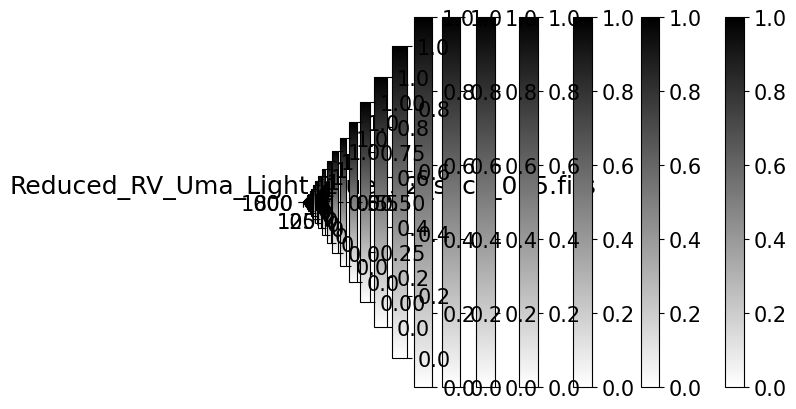

In [20]:
for file in file_list:
    with fits.open(file) as hdul:
        hdul1 = hdul[0].data
        zscale = ZScaleInterval()
        plt.imshow(zscale(hdul1), cmap='gray_r', origin='lower')
        plt.colorbar()
        plt.title(os.path.basename(file))

        # Get the coordinates for the stars in this image
        x_coord = df_sorted['uma_x']#.values[0]
        y_coord = df_sorted['uma_y']#.values[0]
        df_image = df_sorted[df_sorted['FITS Name'] == os.path.basename(file)]
        #positions = np.transpose((df_image['uma_x'], df_image['uma_y']))
        positions = np.transpose((x_coord, y_coord)) 

        # Create circular annuli around the stars
        #annuli = CircularAnnulus(positions, r_in = 21, r_out = 21*np.sqrt(5))  
        annuli = CircularAnnulus((x_coord, y_coord), r_in = 21, r_out = 21*np.sqrt(5)) 

        # Plot the circular annuli
        annuli.plot(color='red', lw=1, alpha=1)
        plt.ylim(800,1000)
        plt.xlim(1000,1300)

        #plt.show()


# Now we know they all match up we can begin calculations 

In [21]:
#Finding the required annulus stats:
annulus_stats = ApertureStats(hdul1, annuli)
#print(annulus_stats)
df_star_stats['Median of annulus'] = annulus_stats.median
df_star_stats['id'] = annulus_stats.id
df_star_stats

,Area of circular aperture,Sum of circular aperture,Median of annulus,id
0,1385.44236,3486.051272,2.501075,1
1,1385.44236,3492.293013,2.505028,2


In [22]:
#THE AREA OF APERTURE MATCHES WITH MINE, BUT NOT APERTURE SUM OR ANNULUS MEDIAN. SUM IS PROBABLY DUE TO STAR NOT MATCHING WITH APERTURE.
#Calculating the star counts:
def star_counts():
    Ct = df_star_stats['Sum of circular aperture']
    Ca = df_star_stats['Area of circular aperture']
    P = df_star_stats['Median of annulus']
    star_counts = Ct - (P*Ca)
    return star_counts
df_star_stats['star counts'] = star_counts ()
df_star_stats

,Area of circular aperture,Sum of circular aperture,Median of annulus,id,star counts
0,1385.44236,3486.051272,2.501075,1,20.955980
1,1385.44236,3492.293013,2.505028,2,21.721756


C:\Users\micha\AppData\Local\Temp\ipykernel_32796\3195458265.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(df_sorted['time_sec'], df_star_stats['star counts'], '.b-', color = 'blue', markersize = 1, label = 'RV Uma')


ValueError: x and y must have same first dimension, but have shapes (55,) and (2,)

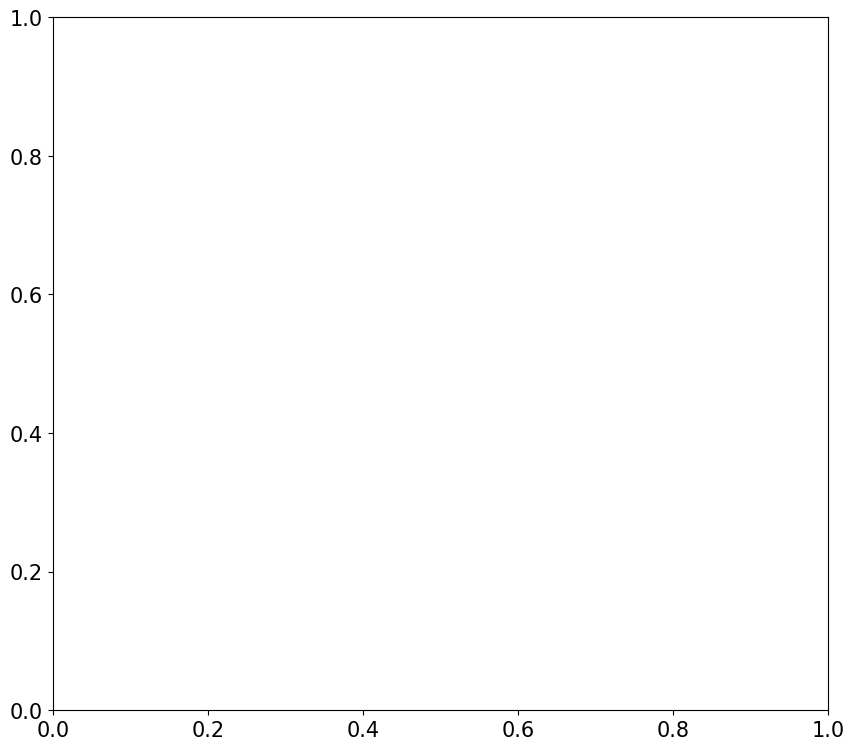

In [23]:
#PLotting star counts against time:
df_sorted['time_sec'] = df_sorted['Time_since_first (hrs)']*60*60
fig = plt.figure(figsize=(10,9))
ax = fig.add_subplot(1,1,1)
ax.plot(df_sorted['time_sec'], df_star_stats['star counts'], '.b-', color = 'blue', markersize = 1, label = 'RV Uma')
#ax.plot(df_sorted['Time_since_first (hrs)'], df_counts['standard_counts'], '.b-', color = 'black', markersize = 1, label = 'Standard')
ax.set_xlabel('Time/s', fontsize = 23)
ax.set_ylabel('Star Counts', fontsize = 23)
plt.rcParams.update({'font.size':23})
ax.legend()
plt.show()

In [ ]:
# Initialize an empty list to store the stats for each star
all_star_stats = []

for i, row in df_sorted.iterrows():
    # Get the coordinates for this star
    x, y = row['uma_x'], row['uma_y']
    
    # Create a circular aperture around the star
    aperture = CircularAperture((x, y), r=21)
    
    # Create a circular annulus around the star
    annulus = CircularAnnulus((x, y), r_in=21, r_out=21*np.sqrt(5))
    
    # Calculate the photometry for the star and annulus
    phot_table = aperture_photometry(hdul1, aperture)
    annulus_table = aperture_photometry(hdul1, annulus)
    
    # Calculate the median background value in the annulus
    annulus_masks = annulus.to_mask(method='center')
    annulus_data = annulus_masks.multiply(hdul1)
    annulus_data_1d = annulus_data[annulus_masks.data > 0]
    median_bg = np.median(annulus_data_1d)
    
    # Calculate the aperture statistics
    aperture_masks = aperture.to_mask(method='center')
    aperture_data = aperture_masks.multiply(hdul1)
    aperture_data_1d = aperture_data[aperture_masks.data > 0]
    flux = phot_table['aperture_sum'][0] - median_bg * aperture.area
    median_flux_bgsub = np.median(aperture_data_1d) - median_bg
    aperture_stats = ApertureStats(hdul1, aperture)
    
    # Append the stats to the list
    all_star_stats.append({
        'Filename': os.path.basename(file),
        'Star ID': row['FITS Name'],
        #'Times from header': image_time,
        #'Exposure Time': exposure_time,
        'X': x,
        'Y': y,
        'Aperture Sum': phot_table['aperture_sum'][0],
        'Aperture Area': aperture.area,
        'Median Background': median_bg,
        'Flux': flux,
        'Median Flux Background Subtracted': median_flux_bgsub,
        'Aperture ID': aperture_stats.id,
        'Aperture Area (pixels)': aperture_stats.sum_aper_area.value,
        'Aperture Min': aperture_stats.min,
        'Aperture Max': aperture_stats.max,
        'Aperture Mean': aperture_stats.mean,
        'Aperture Std': aperture_stats.std,
        'Aperture Median': aperture_stats.median,
        'Aperture Total': aperture_stats.sum,
        #'Aperture Center X': aperture_stats.center_x,
        #'Aperture Center Y': aperture_stats.center_y,
        #'Aperture Center I': aperture_stats.center_i,
    })
    
# Convert the list of stats to a dataframe
df_all_star_stats = pd.DataFrame(all_star_stats)
df_all_star_stats

In [ ]:
#PLotting star counts against time:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
#ax.plot(df_counts['time'], df_counts['uma_counts'], '.b-', color = 'blue', markersize = 1, label = 'RV Uma')
ax.plot(df_sorted['Time_since_first (hrs)'], df_all_star_stats['Aperture Total'], 'o', color = 'black', markersize = 5, label = 'Standard')
ax.set_xlabel('Time/hrs', fontsize = 23)
ax.set_ylabel('Star Counts', fontsize = 23)
plt.rcParams.update({'font.size':23})
ax.legend()
plt.show()

Outlier Removal: You can remove any outlier data points that are not consistent with the general trend of the data. This can be done using statistical techniques such as median absolute deviation or sigma-clipping.

Smoothing: You can try smoothing the light curve to reduce the impact of any noise or variability in the data. This can be done using techniques such as moving average, median filtering, or Savitzky-Golay filtering.

Phase Folding: You can fold the light curve over the period of the star to bring out any periodic variations. This can be done by dividing the time axis by the period of the star and plotting the magnitude as a function of the phase.

Bin Averaging: You can average the data points into bins to reduce the impact of any noise or variability in the data. This can be done by dividing the time axis into equal-sized bins and averaging the magnitude values in each bin.

Polynomial Fitting: You can fit a higher-order polynomial to the data to capture any underlying trends in the light curve. However, this should be done with caution, as higher-order polynomials can be prone to overfitting the data.

When trying to plot a light curve from a fits image, several factors need to be considered in order to calculate the magnitude of the source accurately. These include:

Exposure time: the length of time the CCD was exposed to light.

Aperture size: the size of the aperture used to measure the flux from the source. The aperture should be large enough to capture all the light from the source but not too large as to include background sky noise.

Sky subtraction: the background sky noise needs to be subtracted from the total flux measurement in order to get an accurate measurement of the source flux.

Atmospheric extinction: the amount of light that is absorbed or scattered by the Earth's atmosphere as it passes through to the telescope. This can cause a decrease in the brightness of the source and needs to be corrected for.

Instrumental zero-point: a measure of the sensitivity of the CCD camera and telescope system. This needs to be determined and subtracted from the flux measurement.

Once these factors have been taken into account, the magnitude of the source can be calculated using the formula:

magnitude = -2.5 * log10(flux / exposure_time) + zero_point + extinction

where flux is the flux measured within the aperture, exposure_time is the exposure time of the image, zero_point is the instrumental zero-point, and extinction is the atmospheric extinction.



